# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>

## Esercizi di laboratorio N.2


E' possibile cambiare i parametri in ingresso modificando il file "Parameters.dat" (vedi "Guida.txt").
Questo jupyter elabora i risultati presenti nella cartella "RisultatiNotebook". Se si cambiano i parametri di esecuzione è necessario copiare i nuovi risultati in questa cartella.

### Esercizio 02_1   Monte Carlo Integral

Uso metodi Monte Carlo per calcolare numericamente l'integrale 

$$I=\int_0^1 \frac{\pi}{2}cos(\frac{\pi x}{2})dx=1$$

1. campionando uniformemente i punti
2. usando il metodo dell'importance sampling

I grafici che seguono riportano i risultati in funzione del numero dei punti estratti. Come per gli esercizi precedente è stato usato il metodo della divisione in blocchi.
Per il metodo importance sampling ho usato una distribuzuone lineare. 
Come è evidente comparando i valori sull'asse delle ordinate, il secondo metodo è molto più preciso.

Numero totale di estrazioni M = 20000.0
Numero di blocchi N = 100.0


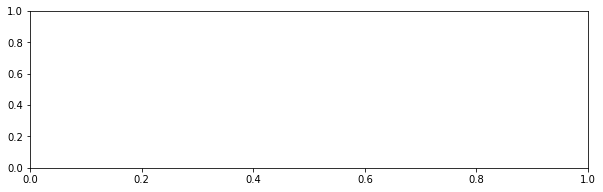

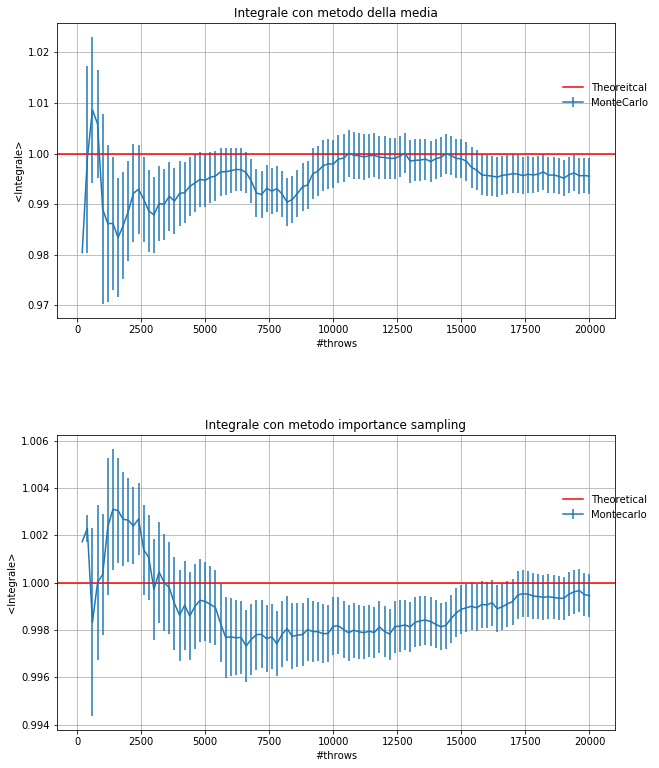

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

M, N = np.loadtxt("RisultatiNotebook/es02_1/Parameters.dat")
L=int(M/N)            # Number of throws in each block, please use for M a multiple of N

print("Numero totale di estrazioni M =", M)
print("Numero di blocchi N =", N)

fig=plt.figure(figsize=(10,13))
fig.subplots_adjust(hspace=0.4, wspace=0.5)
plt.subplot(2,1,1)
x, f , error=  np.loadtxt("RisultatiNotebook/es02_1/DataU.dat", usecols=(0,1,2), delimiter='   ', unpack='true')
x*=L # Number of throws = block * (Number of throws in each block)
plt.errorbar(x,f, yerr=error, label="MonteCarlo")
plt.title('Integrale con metodo della media')
plt.xlabel('#throws')
plt.ylabel('<Integrale>')
plt.axhline(y=1,color ='r', label="Theoreitcal")
plt.legend(loc=(0.9,0.7), frameon=False)
plt.grid(True)

plt.subplot(2,1,2)
x, f , error=  np.loadtxt("RisultatiNotebook/es02_1/DataI.dat", usecols=(0,1,2), delimiter='   ', unpack='true')
x*=L
plt.axhline(y=1,color ='r', label="Theoretical")
plt.errorbar(x,f, yerr=error, label="Montecarlo")
plt.title('Integrale con metodo importance sampling')
plt.xlabel('#throws')
plt.ylabel('<Integrale>')
plt.legend(loc=(0.9,0.7), frameon=False)
plt.grid(True)

plt.show()

In [2]:
fig=plt.figure(figsize=(10,15))
fig.subplots_adjust(hspace=0.4, wspace=0.5)

plt.subplot(4,1,1)
N, f , error=  np.loadtxt("RisultatiNotebook/es02_1_ErrorStudy/DataErr.dat", usecols=(0,1,2), delimiter='   ', unpack='true')

plt.errorbar(N,f, yerr=error, label="MonteCarlo")
plt.title('Integrale con metodo della media')
plt.xlabel('#throws')
plt.ylabel('<Integrale>')
plt.axhline(y=1,color ='r', label="Theoreitcal")
plt.legend(loc=(0.9,0.7), frameon=False)
plt.grid(True)

plt.subplot(4,1,2)
plt.plot(N,error, label="MonteCarlo")
plt.legend(loc=(0.9,0.7), frameon=False)
plt.grid(True)


plt.show()

OSError: RisultatiNotebook/es02_1_ErrorStudy/DataErr.dat not found.

### Esercizio 02_2     Random Walk

Simulazione di un random walk su reticolo cubico e nel continuo. Ci chiediamo qual è la posizione finale dopo $i$ passi.
Il RW che vogliamo visualizzare è isotropo: uguale probabilità di selezionare una direzione. 
Indichiamo con $\vec{r}_N$ la posizione finale. Il valore medio è $\langle \vec{r}_N \rangle=0$. Dunque, la varianza è

$$ \sigma^2_{RW}=\langle |\vec{r}_N|^2 \rangle-|\langle \vec{r}_N \rangle|^2= \langle |\vec{r}_N|^2 \rangle$$

Rappresento $\sqrt{\langle |\vec{r}_N|^2 \rangle }$ per entrambi RW in funzione del numero di passi $i \in [0, 10^2]$, con la sua incertezza. In particolare attraverso una simulazione Monte Carlo stimo il valore di $\langle |\vec{r}_N|^2 \rangle $ con la sua incertezza, utilizzando il metodo della divisione in blocchi. Estraendo la radice e propagando le incertezze ottengo poi il risultato finale.

E' possibile cambiare il numero di simulazioni da eseguire per ogni passo (vedi Guida.txt).

Sui dati è eseguito un fit con una funzione del tipo $f(N)=k\sqrt{N}$.


Numero di blocchi = 100.0
Lunghezza del passo = 1.0
Numero di passi = 50.0
Numero di simulazioni su cui medio = 10000.0

Parametro ottimizzato
[0.99967081]
Incertezza
[0.00035355]


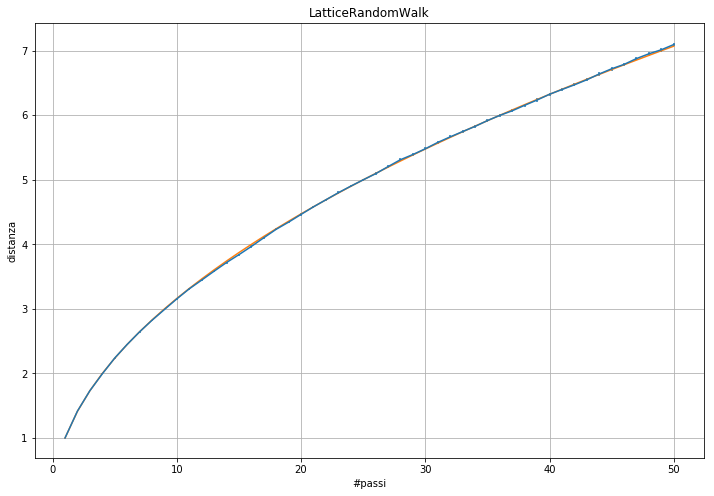

In [16]:
from scipy.optimize import curve_fit

Npassi, Nsimul, Lpasso, Nblocchi = np.loadtxt("RisultatiNotebook/es02_2/Parameters.dat")

def g(x,a):  # defining the fitting function
    return a * np.sqrt(x)

#x = np.linspace(0,100,100,endpoint=True)
a = 1
print("Numero di blocchi =",Nblocchi)
fig=plt.figure(figsize=(12,8))
x, f , error=  np.loadtxt("RisultatiNotebook/es02_2/Risultati/LatticeData.dat", usecols=(0,1,2), delimiter='   ', unpack='true')
plt.errorbar(x,f, yerr=error)

p_opt, p_cov = curve_fit(g,x, f, bounds=(0,10))
f_fit = g(x,p_opt[0])
plt.plot(x,f_fit) # plotting fitted function

plt.title('LatticeRandomWalk')
plt.xlabel('#passi')
plt.ylabel('distanza')
plt.grid(True)

print("Lunghezza del passo =", Lpasso)
print("Numero di passi =", Npassi)
print("Numero di simulazioni su cui medio =",Nsimul)
print("")
print('Parametro ottimizzato')
print(p_opt)
print("Incertezza")
print(np.sqrt(np.diagonal(p_cov)))

plt.show()

Per campionare l'angolo solido ho estratto uniformemente l'angolo $\phi$ tra $0$ e $2\pi$. Per l'angolo $\theta$ non posso usare un campionamento uniforme, altrimenti campionerei troppi punti agli estremi della sfera e troppi pochi sull'equatore, ricoprendo non uniformemente l'angolo solido. E' necessario ricordarsi dello Jacobiano di trasformazione delle coordinate cartesiane in sferiche quando si considera l'elemento di angolo solido. Attraverso il metodo della cumulativa si ricava la distribuzione di $\theta$. 

Lunghezza del passo= 1.0
Numero di passi= 50.0
Numero di simulazioni su cui medio= 10000.0

Parametro ottimizzato
[0.99692825]
Incertezza
[0.00021065]


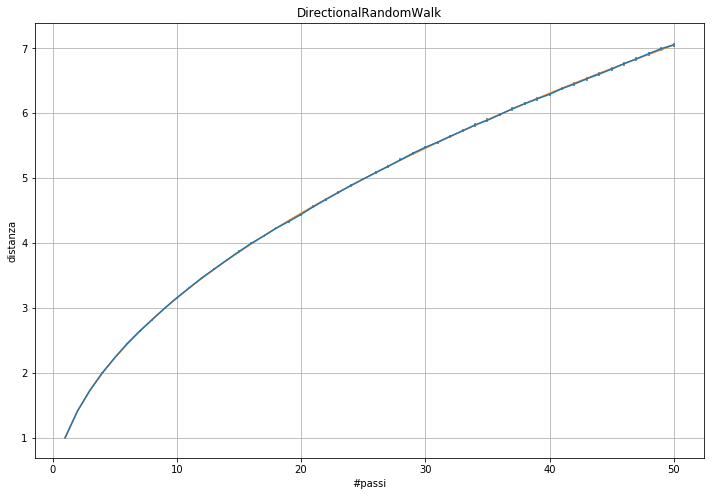

In [17]:
def g(x,a):  # defining the fitting function
    return a * np.sqrt(x)
Npassi, Nsimul, Lpasso, Nblocchi = np.loadtxt("RisultatiNotebook/es02_2/Parameters.dat")
a = 1
fig=plt.figure(figsize=(12,8))
x, f , error=  np.loadtxt("RisultatiNotebook/es02_2/Risultati/DirData.dat", usecols=(0,1,2), delimiter='   ', unpack='true')
plt.errorbar(x,f, yerr=error)

p_opt, p_cov = curve_fit(g,x, f, bounds=(0,10))
f_fit = g(x,p_opt[0])
plt.plot(x,f_fit) # plotting fitted function
plt.title('DirectionalRandomWalk')
plt.xlabel('#passi')
plt.ylabel('distanza')
plt.grid(True)

print("Lunghezza del passo=", Lpasso)
print("Numero di passi=", Npassi)
print("Numero di simulazioni su cui medio=",Nsimul)
print("")
print('Parametro ottimizzato')
print(p_opt)
print("Incertezza")
print(np.sqrt(np.diagonal(p_cov)))

plt.show()

Ho salvato le posizioni di 500 "camminatori" random e ho eseguito un plot 3d. Nel grafico che segue ho volontariamente riscalato gli assi per rendere evidente il processo di diffusione.
I punti sono stati salvati a 1, 10, 30 e 45 passi. 


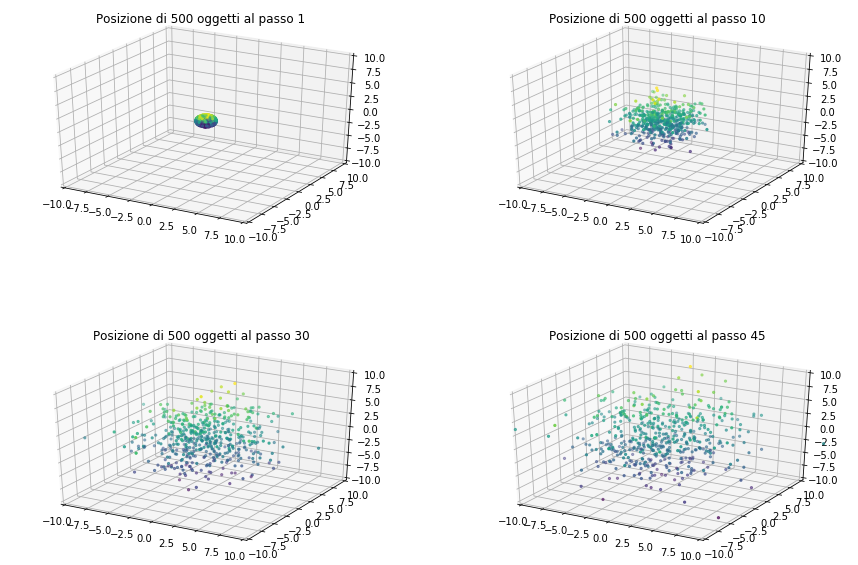

In [18]:
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure(figsize=(15,10))
fig.subplots_adjust(hspace=0.4, wspace=0.2)

l=10.#limite per assi
ax1= plt.subplot(221, projection='3d')
ax1.set_xlim(-l,l)
ax1.set_ylim(-l,l)
ax1.set_zlim(-l,l)
Passo, X, Y, Z= np.loadtxt("./es02_2/posizioni/Posizioni1.dat", usecols=(0,1,2,3), delimiter='   ', unpack='true')
plt.title('Posizione di 500 oggetti al passo 1')
Punti= ax1.scatter(X,Y,Z,c=Z,marker='.')

ax2= plt.subplot(222, projection='3d')
ax2.set_xlim(-l,l)
ax2.set_ylim(-l,l)
ax2.set_zlim(-l,l)
Passo, X, Y, Z= np.loadtxt("./es02_2/posizioni/Posizioni10.dat", usecols=(0,1,2,3), delimiter='   ', unpack='true')
plt.title('Posizione di 500 oggetti al passo 10')
Punti= ax2.scatter(X,Y,Z,c=Z, marker='.')

ax3=plt.subplot(223, projection='3d')
ax3.set_xlim(-l,l)
ax3.set_ylim(-l,l)
ax3.set_zlim(-l,l)
Passo, X, Y, Z= np.loadtxt("./es02_2/posizioni/Posizioni30.dat", usecols=(0,1,2,3), delimiter='   ', unpack='true')
plt.title('Posizione di 500 oggetti al passo 30')
Punti= ax3.scatter(X,Y,Z,c=Z,marker='.')

ax4=plt.subplot(224, projection='3d')
ax4.set_xlim(-l,l)
ax4.set_ylim(-l,l)
ax4.set_zlim(-l,l)
Passo, X, Y, Z= np.loadtxt("./es02_2/posizioni/Posizioni45.dat", usecols=(0,1,2,3), delimiter='   ', unpack='true')
plt.title('Posizione di 500 oggetti al passo 45')
Punti= ax4.scatter(X,Y,Z,c=Z, marker='.')

plt.show()